The purpose of this dataset is to attempt to predict the overall worldwide box office revenue for over 7,000 past films. Some of the features included within this dataset include: cast, crew, plot, keywords, budget, posters, release dates, languages, production companies, production countries, etc. As always, before making any predictions, it is vital to become familiar with our data and so in this kernel I will be conducting an initial Exploratory Data Analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from datetime import datetime
import ast

plt.style.use('seaborn')

In [2]:
train = pd.read_csv('/Users/anthonybransford/Desktop/train.csv')

In [3]:
train.shape

(3000, 23)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [5]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0498381,en,Black Sheep,"Rookie cop, Amelia Donaghy reluctantly teams w...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,King Kong,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe43d3c3a36847f8072785', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


After running a describe function on our training set, we can see that there appears to be several missing values. Let's investigate further. 

In [7]:
train.isna().sum().sort_values(ascending=False)

#13 different columns contain a missing value. Let's create a quick visualization below.

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

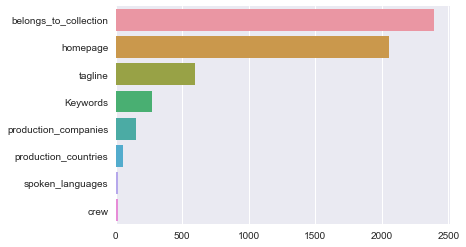

In [9]:
missing = train.isna().sum().sort_values(ascending=False)
sns.barplot(missing[:8],missing[:8].index)
plt.show()

#visualization showing that 'belongs_to_collection', 'homepage', and 'tagline' are the three features with the
#greatest number of missing values.

Let's look a little deeper into some of these columns with missing values. 

In [10]:
import ast
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
dfx = text_to_dict(train)
for col in dict_columns:
       train[col]=dfx[col]

#here I am utilizing Abstract Syntax Trees (ast) in order to extract some of the vital info from features such as
#'belongs_to_collection' which have a lot of useless words/info hiding all the good stuff. 

First up is the 'belongs_to_collection' column. This column contains an Id, Name, Movie Poster and Backdrop URL of the movie in JSON format.

In [11]:
train['belongs_to_collection'].apply(lambda x:len(x) if x!= {} else 0).value_counts()

#this shows that there are 2,396 null values while there are 604 movies that belong to some sort of a collection. 

0    2396
1     604
Name: belongs_to_collection, dtype: int64

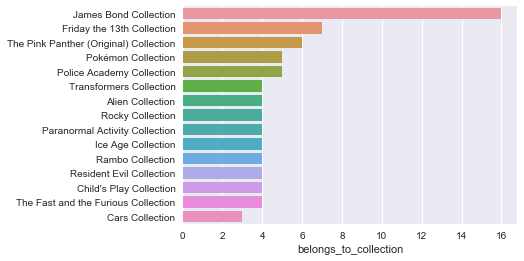

In [12]:
collections = train['belongs_to_collection'].apply(lambda x : x[0]['name'] if x!= {} else '?').value_counts()[1:16]
sns.barplot(collections, collections.index)
plt.show()

#visualization displaying the top 15 movie collections. 

Next, let's take a look at some of the taglines associated with each film. 

In [13]:
train['tagline'].apply(lambda x:1 if x is not np.nan else 0).value_counts()

#597 null values with 2,403 taglines associated with the films found within the train dataset.

1    2403
0     597
Name: tagline, dtype: int64

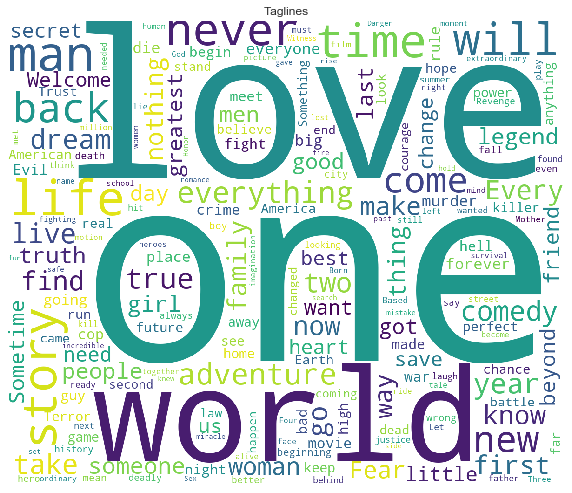

In [14]:
plt.figure(figsize=(10,10))
taglines = ' '.join(train['tagline'].apply(lambda x:x if x is not np.nan else ''))

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(taglines)
plt.imshow(wordcloud)
plt.title('Taglines')
plt.axis("off")
plt.show()

#wordcloud showing some of the more popular taglines found within the dataset.

Now we'll take a quick look at keywords.

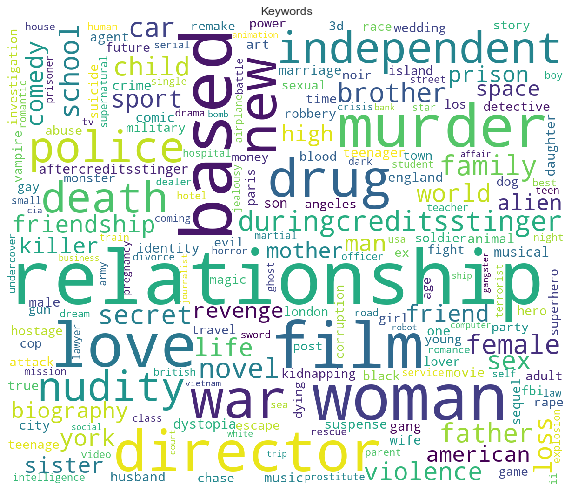

In [19]:
keywords = train['Keywords'].apply(lambda x: ' '.join(i['name'] for i in x) if x != {} else '')
plt.figure(figsize=(10,10))
data = ' '.join(words for words in keywords)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(data)
plt.imshow(wordcloud)
plt.title('Keywords')
plt.axis("off")
plt.show()

#wordcloud showing some of the keywords associated with each film. This wordcloud is certainly a lot more effective
#than the one that I created for taglines, since taglines can be full-on sentences and not just single words. If I 
#were performing feature engineering and modeling within this kernel, it might be helpful to revisit taglines in order
#to better understand whether taglines is a vital feature variable. 

Next up is production companies.

In [20]:
x = train['production_companies'].apply(lambda x : [x[i]['name'] for i in range(len(x))] if x != {} else []).values
Counter([i for j in x for i in j]).most_common(25)

#This is a list of some of the most famous production companies and the number of films released by each. 

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25)]

Now, a quick look at the countries in which the majority of these films are being produced.

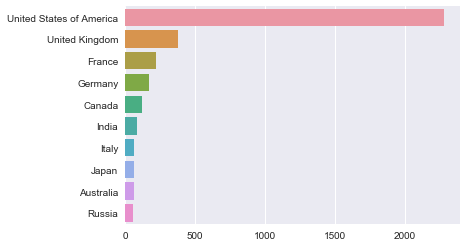

In [21]:
countries = train['production_countries'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values
count = Counter([j for i in countries for j in i]).most_common(10)
sns.barplot([val[1] for val in count],[val[0] for val in count])

#we see that the United States produces far more films than any other country.

Let's move on and take a look at the number of languages spoken in each film. 

In [22]:
train['spoken_languages'].apply(lambda x:len(x) if x !={} else 0).value_counts()

#this shows that there are 2,105 films in which only one language is spoken. There is one film in this dataset where
#9 different languages are spoken.

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

Now that we have found how many different languages are spoken in each film, let's take a look at the languages that are actually being spoken.

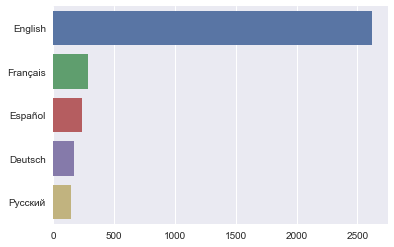

In [23]:
lang = train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count = Counter([i for j in lang for i in j]).most_common(5)
sns.barplot([val[1] for val in count],[val[0] for val in count])

#English is by far the most spoken language, followed by French, Spanish, Dutch, and Russian.

Which genres are most common?

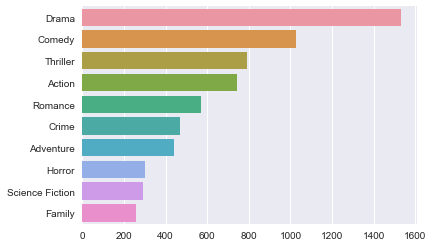

In [25]:
genre = train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count = Counter([i for j in genre for i in j]).most_common(10)
sns.barplot([val[1] for val in count],[val[0] for val in count])

#drama is the most common genre, followed by comedy and thrillers.

As stated at the beginning of this kernel, the entire purpose of this dataset is to predict box office revenue for various films. As a result, 'revenue' will be our target variable. Why don't we take a look at the distribution of this feature?

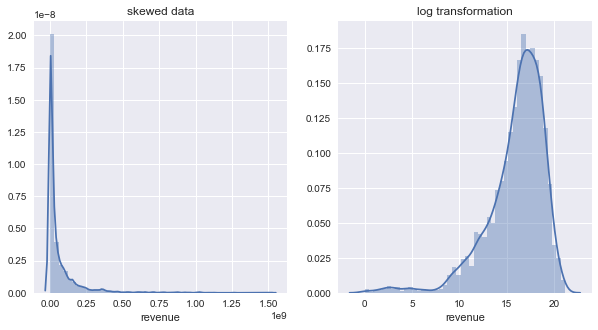

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('skewed data')
sns.distplot(train['revenue'])
plt.subplot(1,2,2)
plt.title('log transformation')
sns.distplot(np.log(train['revenue']))
plt.show()

#the first plot shows our original distribution. As we can see, the data is skewed off to the left. The second plot
#shows our distribution after we have performed a log transformaton. 

In [27]:
train['log_revenue'] = np.log1p(train['revenue'])

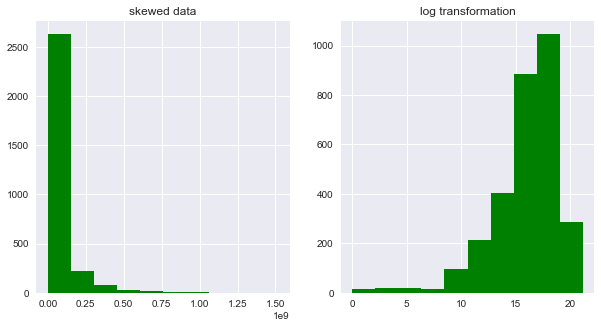

In [28]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(train['revenue'], bins=10, color='g')
plt.title('skewed data')
plt.subplot(1,2,2)
plt.hist(np.log(train['revenue']), bins=10, color='g')
plt.title('log transformation')
plt.show()

#here is a histogram showing both the skewed and log transformed 'revenue' data.

In [29]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

I took a guess and assumed that the 'budget' feature might be important in predicting a films 'revenue' so let's take a deeper look at 'budget'.

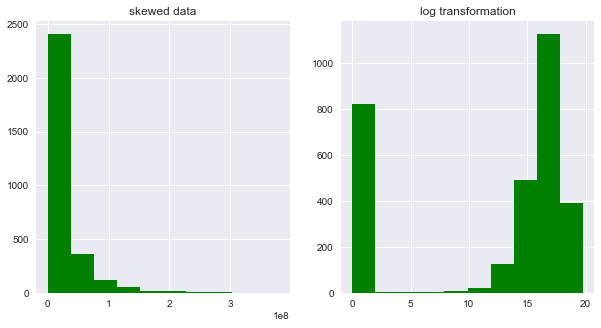

In [30]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(train['budget']+1, bins=10, color='g')
plt.title('skewed data')
plt.subplot(1,2,2)
plt.hist(np.log(train['budget']+1), bins=10, color='g')
plt.title('log transformation')
plt.show()

#here is a histogram showing both the skewed and log transformed 'budget' data.

Is there a relationship between 'budget' and 'revenue'?

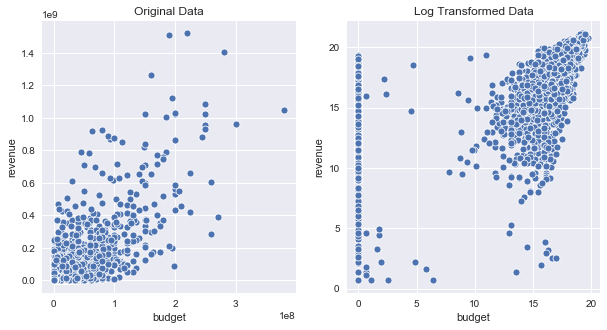

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Data')
sns.scatterplot(train['budget'], train['revenue'])
plt.subplot(1,2,2)
plt.title('Log Transformed Data')
sns.scatterplot(np.log1p(train['budget']),np.log1p(train['revenue']))
plt.show()

It certainly does not appear as if there is a linear relationship among budget and revenue. How about we take a look at the relationship between 'popularity' and 'revenue'?

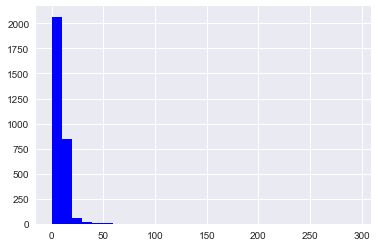

In [32]:
plt.hist(train['popularity'], bins=30, color='b')
plt.show()

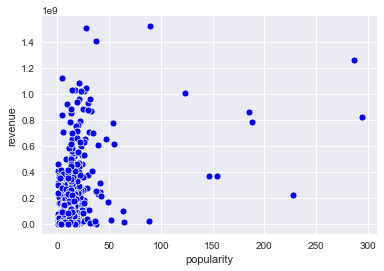

In [33]:
sns.scatterplot(train['popularity'], train['revenue'], color='b')
plt.show()

#once again, we do not see a linear relationship.

Why don't we take some time to explore some release dates?

In [34]:
train.release_date

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
5         8/6/87
6        8/30/12
7        1/15/04
8        2/16/96
9        4/16/03
10      11/21/76
11       7/10/87
12       9/15/99
13        3/4/05
14       6/20/02
15       10/6/10
16        8/4/05
17      12/25/13
18        2/2/11
19        8/2/05
20        4/3/98
21       8/13/82
22       7/28/12
23        9/2/11
24        9/9/06
25      10/23/92
26        9/8/97
27        9/7/13
28        8/8/86
29        4/7/02
          ...   
2970    11/25/92
2971    10/12/90
2972     7/27/06
2973      8/9/85
2974     1/28/05
2975     7/31/09
2976      3/3/00
2977     5/15/01
2978    10/23/98
2979     4/23/10
2980      2/4/16
2981      9/9/16
2982     9/12/12
2983      4/4/97
2984      8/8/03
2985     2/17/06
2986      9/3/04
2987     1/20/89
2988     5/20/02
2989     5/11/01
2990     3/28/97
2991     1/12/01
2992     3/18/24
2993     6/17/04
2994     9/18/92
2995     4/22/94
2996     3/28/13
2997    10/11/

In [35]:
train[['release_month','release_day','release_year']] = train['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype(int)

train.loc[(train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[(train['release_year'] > 19) & (train['release_year'] < 100), "release_year"] += 1900

In [36]:
releaseDate = pd.to_datetime(train['release_date']) 

train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

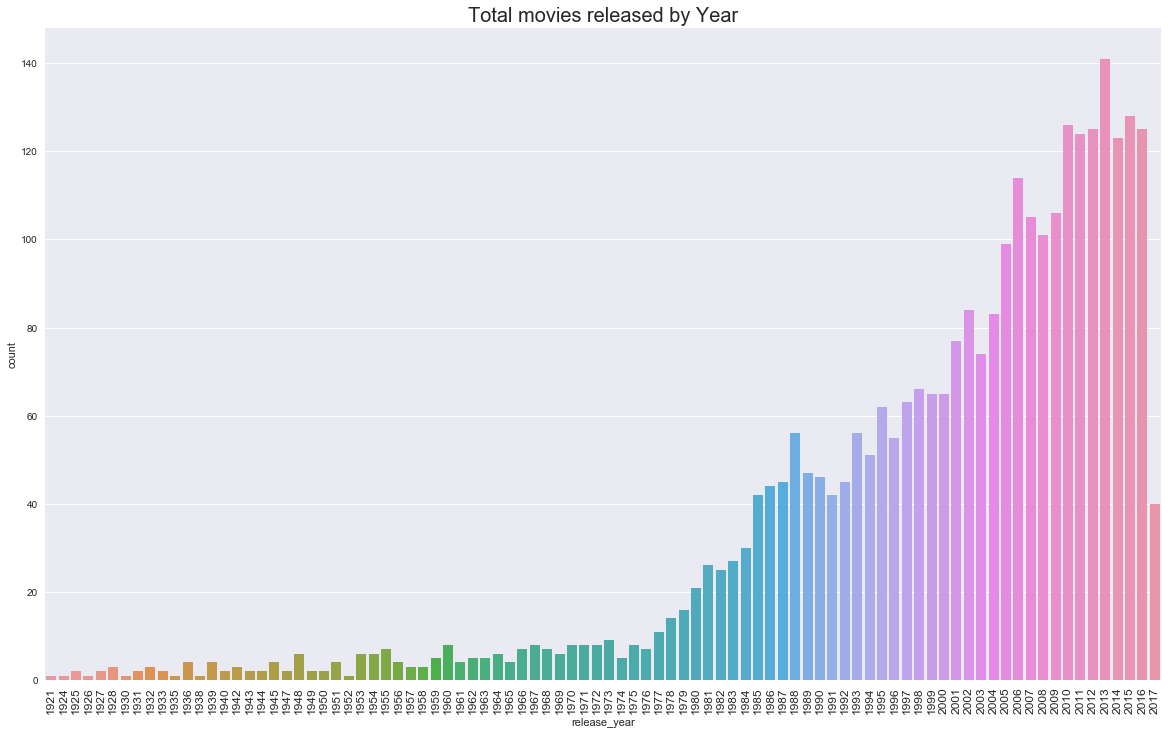

In [37]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_year'].sort_values())
plt.title("Total movies released by Year", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

#plot showing how many movies were released every year.

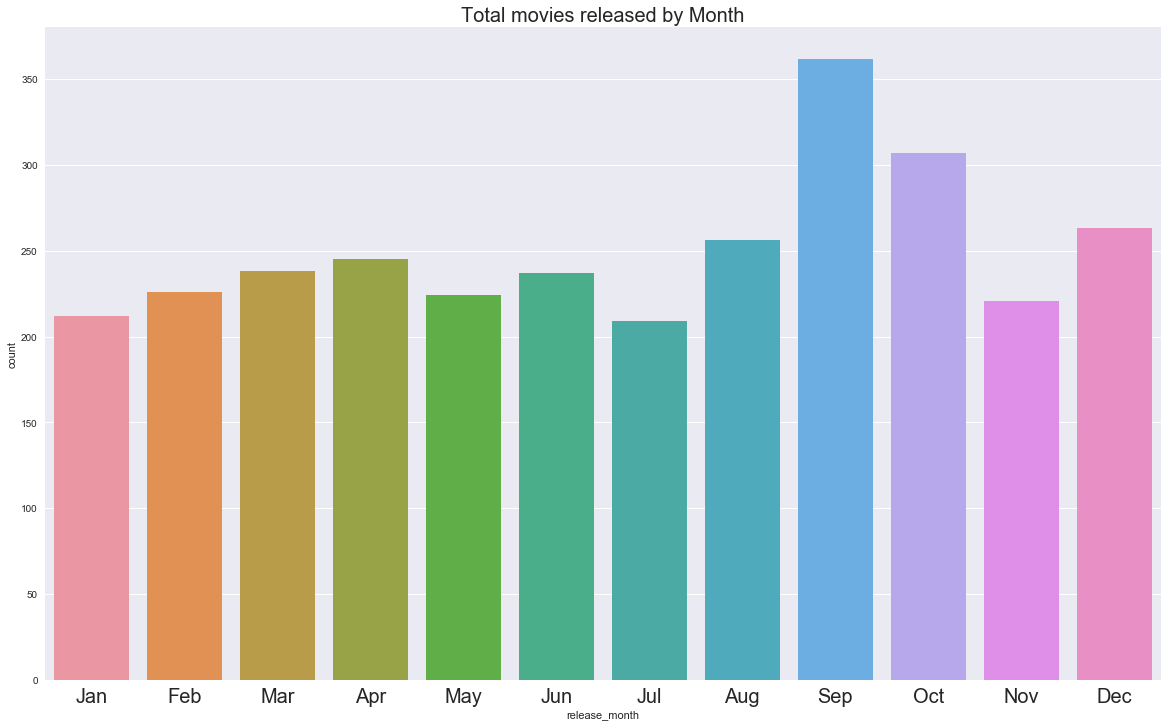

In [38]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_month'].sort_values())
plt.title("Total movies released by Month", fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels, fontsize=20)
plt.show()

#plot showing which months were most popular for film releases. We can see that September is a slight favorite over
#October.

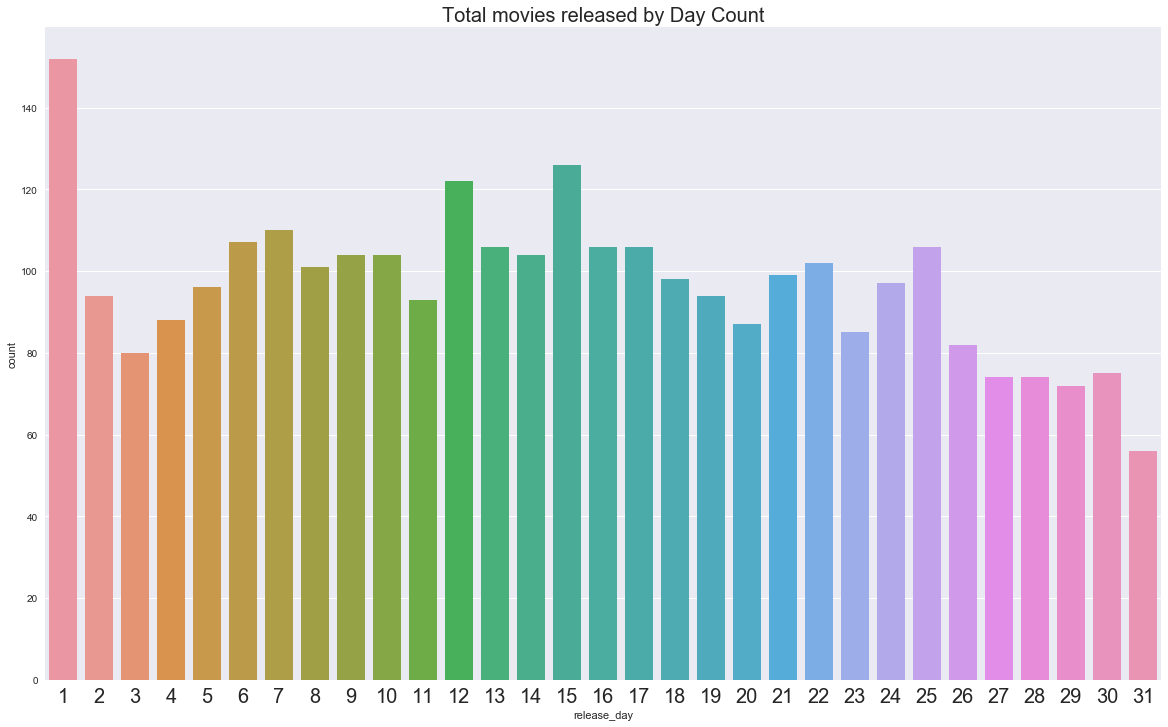

In [39]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_day'].sort_values())
plt.title("Total movies released by Day Count", fontsize=20)
plt.xticks(fontsize=20)
plt.show()

#plot showing which time of the month (day count) is most popular for releases.

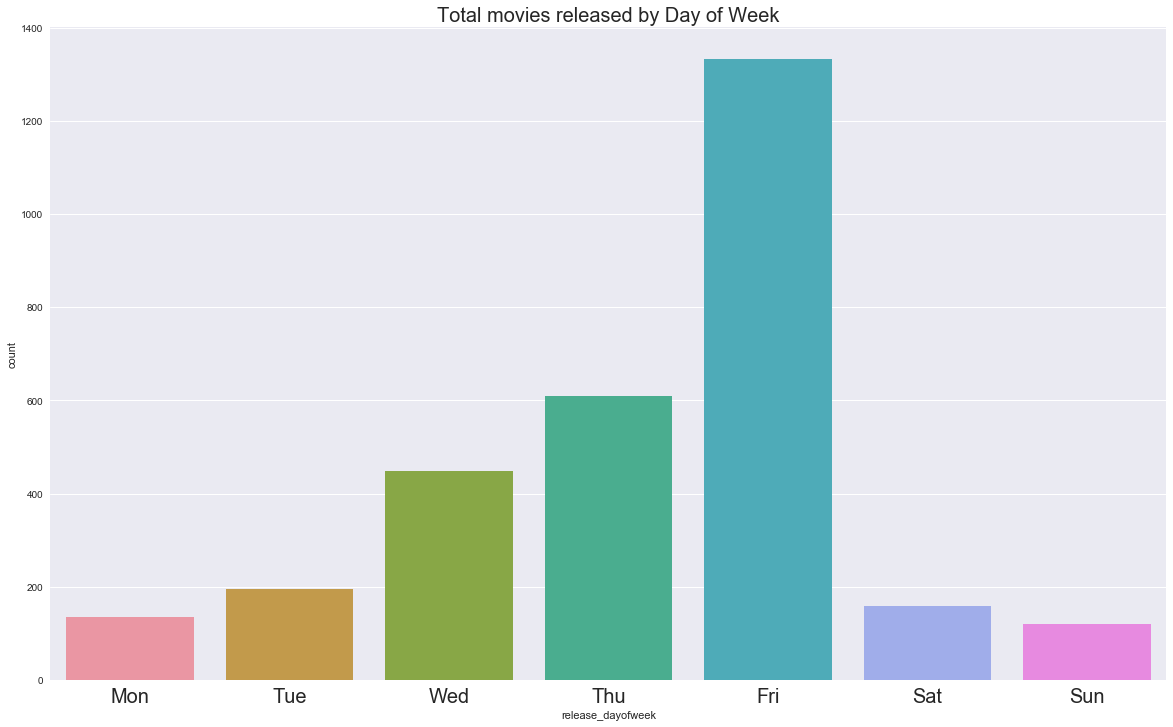

In [40]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Total movies released by Day of Week", fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

#finally, a plot showing which day of the week is most popular for releases. Friday is by far the most popular day
#for film releases. 

Is there a relationship between 'release_dayofweek' and 'revenue'?

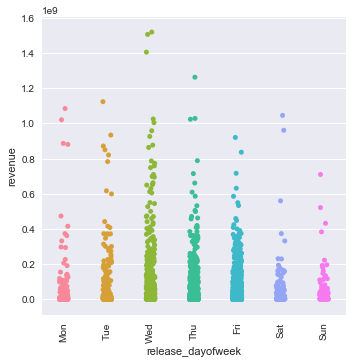

In [41]:
sns.catplot(x='release_dayofweek',y='revenue',data=train)
plt.gca().set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], rotation='90')
plt.show()

#every month with the exception of Sunday has a few outliers that exceed some of Friday's biggest revenues. We should
#consider the fact that Friday has a vastly greater number of releases than any other day of the week. 

How about a relationship between 'release_month' and 'revenue'?

<Figure size 720x1080 with 0 Axes>

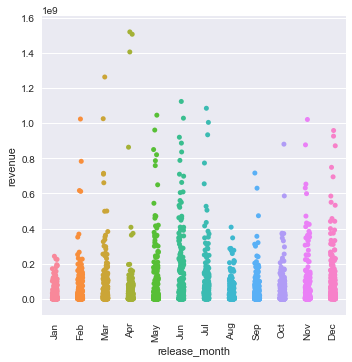

In [42]:
plt.figure(figsize=(10,15))
sns.catplot(x='release_month',y='revenue',data=train)
month_lst = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.gca().set_xticklabels(month_lst, rotation='90')
plt.show()

#Although the months of September, October, and December see the greatest number of releases, 
#the months of April, March, and June yield the greatest max revenues.

Finally, let's look at 'release_year' vs. 'revenue'.

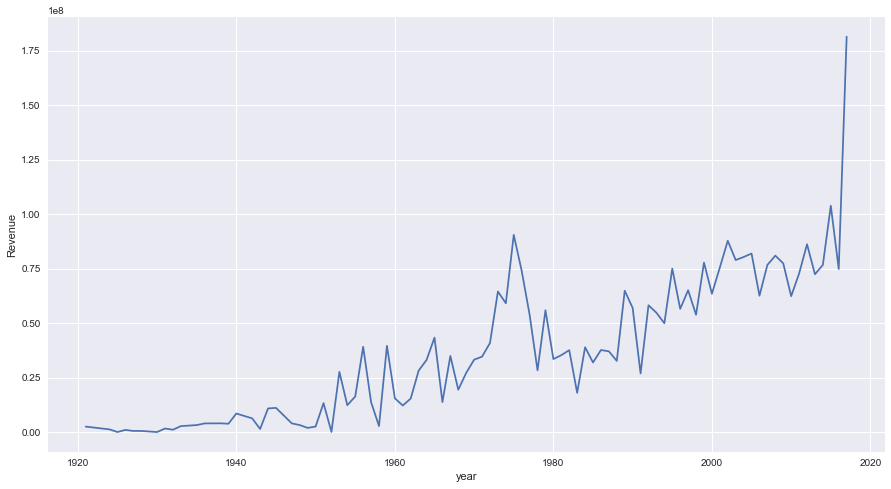

In [43]:
plt.figure(figsize=(15,8))
yearly = train.groupby(train['release_year'])['revenue'].agg('mean')
plt.plot(yearly.index, yearly)
plt.xlabel('year')
plt.ylabel("Revenue")
plt.savefig('fig')

#Revenue from films seems to oscillate but overall has increased drastically throughout the years. We should also 
#note the steep increase in revenue after 2017~.

Moving on, I thought it might be interesting to revisit genres but this time inspect them from the point of revenue, budget, popularity, and runtime.

In [44]:
genres = train.loc[train['genres'].str.len()==1][['genres','revenue','budget','popularity','runtime']].reset_index(drop=True)
genres['genres'] = genres.genres.apply(lambda x :x[0]['name'])

In [45]:
genres = genres.groupby(genres.genres).agg('mean')

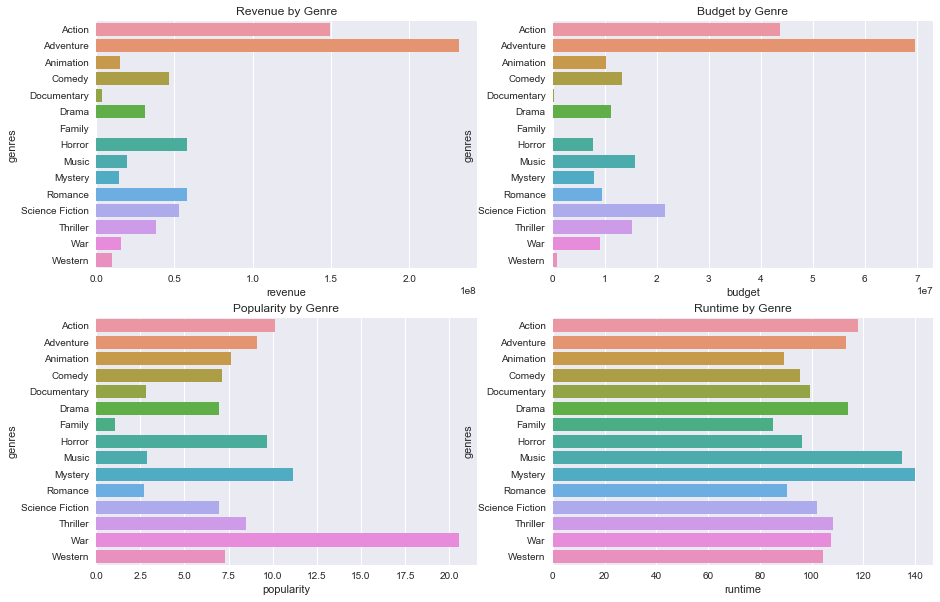

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Revenue by Genre')
sns.barplot(genres['revenue'],genres.index)

plt.subplot(2,2,2)
plt.title('Budget by Genre')
sns.barplot(genres['budget'],genres.index)

plt.subplot(2,2,3)
plt.title('Popularity by Genre')
sns.barplot(genres['popularity'],genres.index)

plt.subplot(2,2,4)
plt.title('Runtime by Genre')
sns.barplot(genres['runtime'],genres.index)

Finally, to wrap up my EDA on this kernel, I'd like to extract some crew and cast info.

In [80]:
crew = train['crew'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in crew for i in j]).most_common(25)

#this is a list showing the 25 crew members that have appeared in the most films. This includes directors, producers,
#casting directors, etc.

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30),
 ('Jane Jenkins', 29),
 ('John Debney', 28),
 ('Hans Zimmer', 28),
 ('John Papsidera', 28),
 ('Francis Ford Coppola', 28),
 ('Billy Hopkins', 27),
 ('Danny Elfman', 27),
 ('Mindy Marin', 27),
 ('Hans Bjerno', 26),
 ('Sarah Finn', 26)]

In [81]:
cast = train['cast'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in cast for i in j]).most_common(25)

#here is a list showing the 25 actors/actresses that have appeared in the most films. 

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21),
 ('Frank Welker', 20),
 ('Michael Caine', 20),
 ('George Clooney', 20),
 ('Denzel Washington', 20),
 ('Robert Duvall', 20)]

Now that we have performed a good amount of Exploratory Data Analysis, we would want to move on to some feature engineering and then begin to experiment with various models in order to attempt to accurately predict for our target feature: 'revenue'.